# Handwritten Digit Classification (Basic)

Required: keras, numpy, matplotlib

In [30]:
import warnings
# warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

### Load the MNIST dataset from Keras's inbuilt database


In [31]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Examine the size and image dimensions
MNIST database of handwritten digits consists of 60,000 28x28 grayscale images of 10 digits along with a test set of 10,000 images

In [32]:
print("Dimension of x_train : " + str(x_train.shape))
print("Dimension of y_train : " + str(y_train.shape))
print()
print("Dimension of x_test  : " + str(x_test.shape))
print("Dimension of y_test  : " + str(y_test.shape))
print()
print("Number of samples in our training data: " + str(len(x_train)))
print("Number of lables in our training data : " + str(len(y_train)))
print("Number of samples in our test data    : " + str(len(x_test)))
print("Number of lables in our test data     : " + str(len(y_test)))
print()
print("Dimension of each image in the training set: " + str(x_train[0].shape))
print("Dimension of each image in the test set    : " + str(x_train[0].shape))
print()
print("Dimension of each label in the training set: " + str(y_train[0].shape))
print("Dimension of each label in the test set    : " + str(y_test[0].shape))

Dimension of x_train : (60000, 28, 28)
Dimension of y_train : (60000,)

Dimension of x_test  : (10000, 28, 28)
Dimension of y_test  : (10000,)

Number of samples in our training data: 60000
Number of lables in our training data : 60000
Number of samples in our test data    : 10000
Number of lables in our test data     : 10000

Dimension of each image in the training set: (28, 28)
Dimension of each image in the test set    : (28, 28)

Dimension of each label in the training set: ()
Dimension of each label in the test set    : ()


### Look at some images in the dataset
1. Using OpenCV
2. Using Matplotlib

In [33]:
# Using OpenCV
import cv2
import numpy as np

for i in range(0, 6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    window_name = 'Random Sample #' + str(i + 1)
    cv2.imshow(window_name, img)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

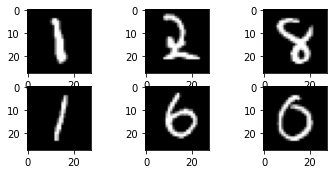

In [34]:
# Using Matplotlib
import matplotlib.pyplot as plt

for i in range(1, 7):
    # Subplot's arguments are nrows, ncols,, index
    plt.subplot('33' + str(i))
    random_num = np.random.randint(0, len(x_train))
    plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))
    
plt.show()

### Prepare the dataset for training

In [35]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Keras requires the fourth dimension as the colour depth, 3 for RGB
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# The shape of a single image
input_shape = (img_rows, img_cols, 1)

# Convert the image type from unit8 to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the dataset, the range is reduced to (0, 1) from (0, 255)
x_train /= 255
x_test /= 255

print("Dimension of x_train: ", x_train.shape)
print("Dimension of x_test : ", x_test.shape)

print()
print("Number of training samples: ", x_train.shape[0])
print("Number of test samples    : ", x_test.shape[0])

Dimension of x_train:  (60000, 28, 28, 1)
Dimension of x_test :  (10000, 28, 28, 1)

Number of training samples:  60000
Number of test samples    :  10000


### One Hot Encoding of Labels

In [36]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print('Number of classes: ' + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of classes: 10


### Create the Model
- First CONV layer uses 32 filters of size 3x3
- Second CONV layer has 64 filters of size 3x3
- Downsample the data to 2x2 and use Dropout where p = 0.25
- Flatten the MaxPool output and connect with FC/Dense layer whose output size is 128
- Apply Dropout where p = 0.50
- Connect to another FC/Dense layer that outputs to 10 categorical units

In [40]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

# Create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3 ), 
                 activation='relu', 
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(0.01),
              metrics = ['accuracy'])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)             

### Train the Model


In [41]:
batch_size = 32
epochs = 10

history = model.fit(x_train, y_train,
                   batch_size = batch_size, epochs = epochs,
                   verbose = 1, validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose = 0)

print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.5627 - accuracy: 0.8247 - val_loss: 0.1891 - val_accuracy: 0.9437
Epoch 2/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2802 - accuracy: 0.9150 - val_loss: 0.1382 - val_accuracy: 0.9596
Epoch 3/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.2107 - accuracy: 0.9384 - val_loss: 0.0995 - val_accuracy: 0.9698
Epoch 4/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1687 - accuracy: 0.9489 - val_loss: 0.0818 - val_accuracy: 0.9755
Epoch 5/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1421 - accuracy: 0.9574 - val_loss: 0.0692 - val_accuracy: 0.9776
Epoch 6/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1223 - accuracy: 0.9633 - val_loss: 0.0603 - val_accuracy: 0.9815
Epoch 7/10
60000/60000 [==============================] - 66s 1ms/s

### Plotting Loss and Accuracy Charts

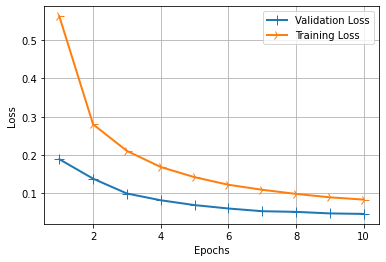

In [44]:
# Plotting Loss Charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')

plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

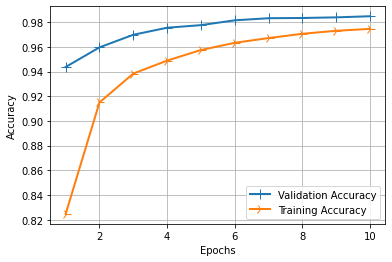

In [52]:
# Plotting Accuracy Charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')

plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

### Save and Load the Model

In [46]:
model.save('./mnist_simple_cnn_10_epochs.h5')

from keras.models import load_model

classifier = load_model('./mnist_simple_cnn_10_epochs.h5')

### Test the Classifier

In [ ]:
import cv2
import numpy as np

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT, value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0, 255, 0), 2)
    cv2.imshow(name, expanded_image)
    
for i in range(0, 10):
    rand = np.random.randint(0, len(x_test))
    input_im = x_test[rand]
    
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
    input_im = input_im.reshape(1, 28, 28, 1)
    
    # Obtain Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 1)[0])
    
    draw_test('Prediction', res, imageL)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

1/1 [==============================] - 0s 3ms/step


### Visualize the Model

In [ ]:
# Save the model diagram to this path
model_diagrams_path = './'

# Generate the model diagram
plot_model(model, to_file=model_diagrams_path + 'model_plot.png',
          show_shapes=True, show_layer_names=True)

# Show the model plot
img = mpimg.imread(model_diagrams_path + 'model_plot.png')
plt.figure(figsize=(30, 15))
imgplot = plt.imshow(img)